In [63]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
data.reset_index(drop=True, inplace=True) 

In [64]:
data = np.array(data) 
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into valid and training sets

data_valid = data[0:1000].T
Y_valid = data_valid[0]
X_valid = data_valid[1:n]
X_valid = X_valid / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [141]:
def init_params():
    
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    K  = np.random.rand(2)
    
    return W1, b1, W2, b2 , K

def ada_act(Z , K):
    return (K[0] + K[1]*Z)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X , K):
    
    Z1 = W1.dot(X) + b1
    A1 = ada_act(Z1 , K)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)    
        
    return Z1, A1, Z2, A2  , K

def ada_act_derivative(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
                 
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    
    dZ1 = W2.T.dot(dZ2) * ada_act_derivative(Z1)
    
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    
    dA1 = np.dot(W2.transpose(), dZ2)
    
    dK = [np.mean(dA1)]
    dK.append(np.mean(np.multiply(dA1, Z1)))
    dK = np.array(dK)
    
    return dW1, db1, dW2, db2 , dK

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha , K , dK):
    
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2 
    K  = K  - alpha * dK
    
    return W1, b1, W2, b2 , K

In [143]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    
    W1, b1, W2, b2 , K = init_params()
    losses = []
    
    for i in range(iterations):
        
        Z1, A1, Z2, A2 , K = forward_prop(W1, b1, W2, b2, X , K)
        
        dW1, db1, dW2, db2 , dK = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        
        W1, b1, W2, b2, K = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha , K , dK)
        
        if i % 10 == 0:
            
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    
    return W1, b1, W2, b2 

In [144]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.01,50)

Iteration:  0
[0 0 0 ... 2 0 8] [4 6 8 ... 9 3 5]
0.0805609756097561
Iteration:  10
[0 0 0 ... 2 0 8] [4 6 8 ... 9 3 5]
0.09948780487804879
Iteration:  20
[0 0 0 ... 2 8 8] [4 6 8 ... 9 3 5]
0.1116829268292683
Iteration:  30
[0 0 0 ... 2 8 8] [4 6 8 ... 9 3 5]
0.12336585365853658
Iteration:  40
[0 6 0 ... 2 8 8] [4 6 8 ... 9 3 5]
0.13375609756097562


In [163]:
K  = np.random.rand(2)
def make_predictions(X, W1, b1, W2, b2 , K):
    _, _, _, A2 , K = forward_prop(W1, b1, W2, b2, X , K)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2 , K)
    label = Y_train[index]
    
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  4


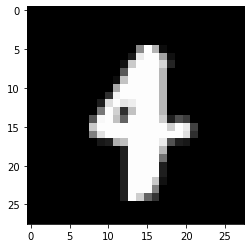

Prediction:  [6]
Label:  6


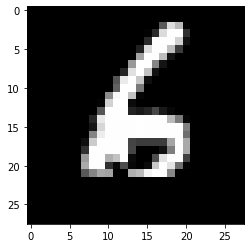

Prediction:  [8]
Label:  8


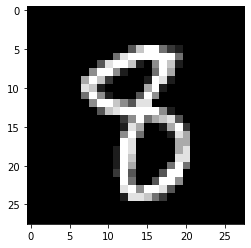

Prediction:  [8]
Label:  7


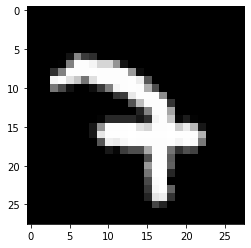

Prediction:  [8]
Label:  1


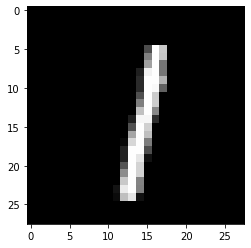

In [166]:
test_prediction( 0, W1, b1, W2, b2)
test_prediction( 1, W1, b1, W2, b2)
test_prediction( 2, W1, b1, W2, b2)
test_prediction( 3, W1, b1, W2, b2)
test_prediction( 4, W1, b1, W2, b2)

In [ ]:
valid_predictions = make_predictions(X_valid, W1, b1, W2, b2 , K)
accuracy = get_accuracy(valid_predictions, Y_valid)

print(accuracy)